In [1]:
%matplotlib inline

In [52]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stats
import numpy as np
import scipy.stats as sts

In [3]:
# load the files
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [4]:
# read the csv and put into a df
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# check the city_data
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
# check the ride_data 
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [8]:
# get the unique value of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
count_urban = 0
count_suburban = 0
count_rural = 0

for area in city_data_df['type']:
    if area == 'Urban':
        count_urban = count_urban + 1
    if area == 'Suburban':
        count_suburban = count_suburban + 1
    if area == 'Rural':
        count_rural = count_rural + 1
        
print(count_urban)
print(count_suburban)
print(count_rural)

66
36
18


In [18]:
# combine the data into a single df
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# display the df
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# create the three new dfs
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [23]:
# get the number of rides for each city
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [25]:
# get the avg fare for each city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [28]:
# get the avg number of drivers for each city
urban_avg_drivers = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_avg_drivers = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_avg_drivers = rural_cities_df.groupby(['city']).mean()['driver_count']

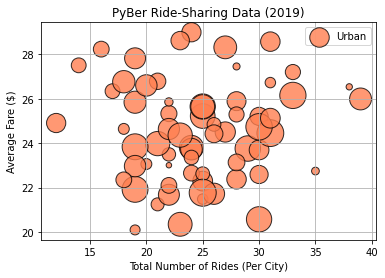

In [29]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_avg_drivers, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

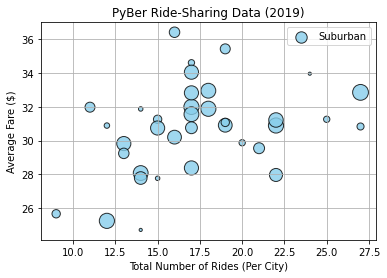

In [30]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

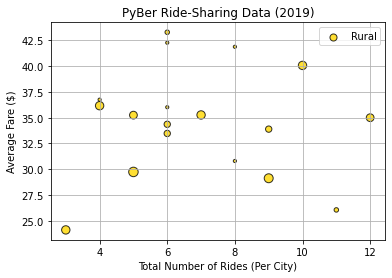

In [31]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

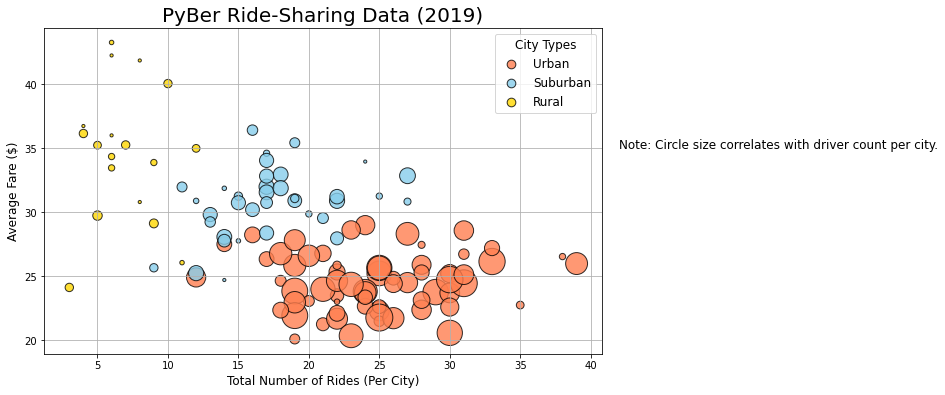

In [42]:
# combine all the scatter charts into one chart
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_avg_drivers, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [46]:
# get summary statistics
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
# calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [49]:
# calculate the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [51]:
# Calculate the mode of the ride count for the urban cities.
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [54]:
# calculate the measures of central tendency for the ride count for the urban city type
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
      
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [55]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [56]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [63]:
# get the fares for the urban cities
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [62]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean for the ride counts for urban trips is ${mean_urban_fares:.2f}.")
      
median_urban_fares = np.median(urban_fares)
print(f"The median for the ride counts for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the ride counts for urban trips is {mode_urban_fares}.")

The mean for the ride counts for urban trips is $24.53.
The median for the ride counts for urban trips is $24.64.
The mode for the ride counts for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [70]:
# get the driver count data from the three types of cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [71]:
# central tendencies for urban drivers
mean_urban_drivers = np.mean(urban_drivers)
print(mean_urban_drivers)
median_urban_drivers = np.median(urban_drivers)
print(median_urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(mode_urban_drivers)
# central tendencies for suburban drivers
mean_suburban_drivers = np.mean(suburban_drivers)
print(mean_suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
print(median_suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(mode_suburban_drivers)
# central tendencies for rural drivers
mean_rural_drivers = np.mean(rural_drivers)
print(mean_rural_drivers)
median_rural_drivers = np.median(rural_drivers)
print(median_rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(mode_rural_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39], dtype=int64), count=array([86]))
13.712
16.0
ModeResult(mode=array([20], dtype=int64), count=array([79]))
4.296
4.0
ModeResult(mode=array([1], dtype=int64), count=array([32]))


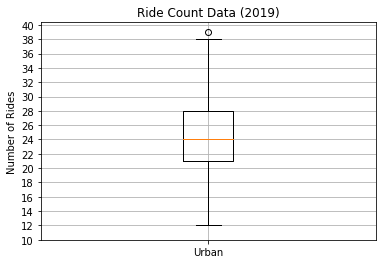

In [72]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2))
ax.grid()
plt.show()

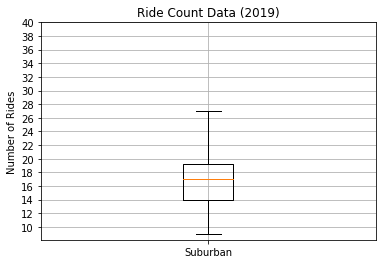

In [78]:
# create a box-and-whisker plot for the suburban cities ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2))
ax.grid()
plt.show()

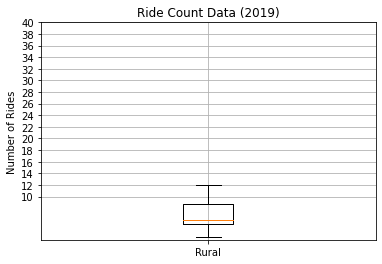

In [74]:
# create a box-and-whisker plot for the rural cities ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2))
ax.grid()
plt.show()

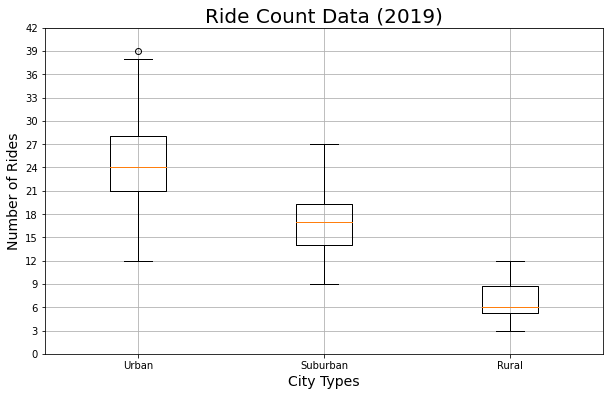

In [76]:
# combine all the box-and-whisker plots
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fir, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(ride_count_data, labels=x_labels)


# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 45, step = 3))
ax.grid()

#save the figure
plt.savefig('analysis/Fig2.png')

plt.show()

In [80]:
# get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


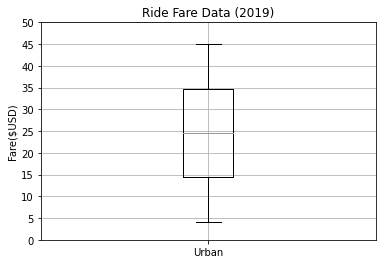

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [81]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

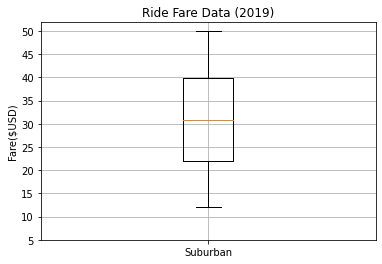

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [86]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

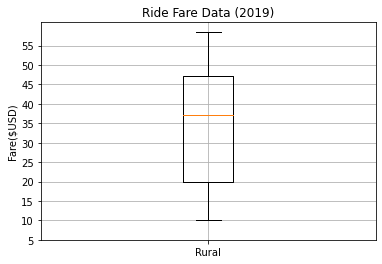

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [85]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

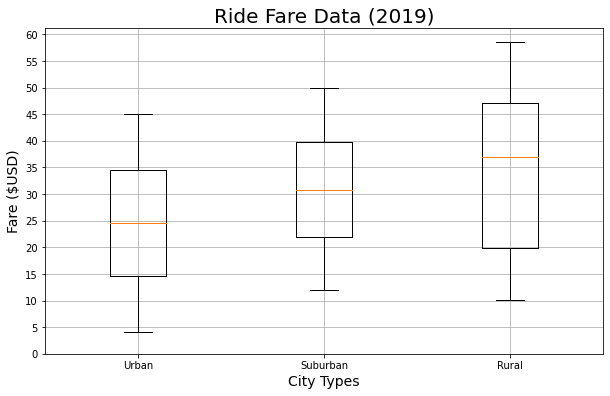

In [88]:
# combine all the box-and-whisker plots
x_labels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fir, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(fare_data, labels=x_labels)


# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 65, step = 5))
ax.grid()

#save the figure
plt.savefig('analysis/Fig3.png')

plt.show()

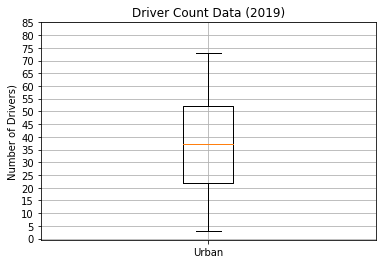

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [89]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

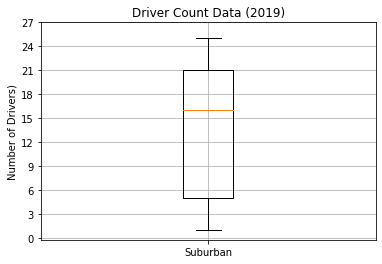

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [92]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

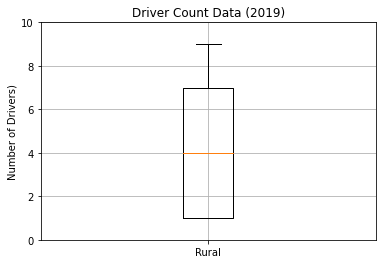

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [94]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 12, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

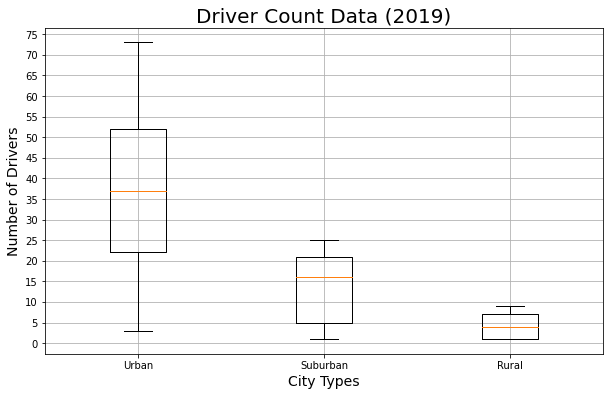

In [95]:
# combine all the box-and-whisker plots
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fir, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(driver_count_data, labels=x_labels)


# add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 80, step = 5))
ax.grid()

#save the figure
plt.savefig('analysis/Fig4.png')

plt.show()

In [106]:
# get the total fares
total_fare = pyber_data_df.sum()['fare']

# type fares
type_fare = pyber_data_df.groupby(['type']).sum()['fare']

# get the percentages for each type
type_percents = type_fare / total_fare * 100

# get the percentage of total fare for rural
rural_fare = pyber_data_df.groupby(['type']).sum()['fare']['Rural'] 
rural_fare_percent = rural_fare / total_fare * 100

# get the percentage of total fare for urban
urban_fare = pyber_data_df.groupby(['type']).sum()['fare']['Urban']
urban_fare_percentage = urban_fare / total_fare * 100

# get the percentage of total fare for suburban
suburban_fare = pyber_data_df.groupby(['type']).sum()['fare']['Suburban']
suburban_fare_percentage = suburban_fare / total_fare * 100

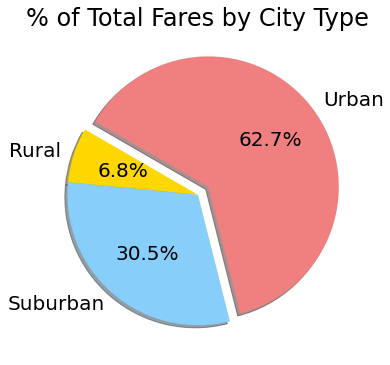

In [124]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [127]:
# number of riders pie chart

# get total number of riders
total_riders = pyber_data_df.count()['ride_id']

# get the total number of riders for each type
type_total_riders = pyber_data_df.groupby(['type']).count()['ride_id']

# get the percentage for each type
type_riders_percentage = type_total_riders / total_riders * 100

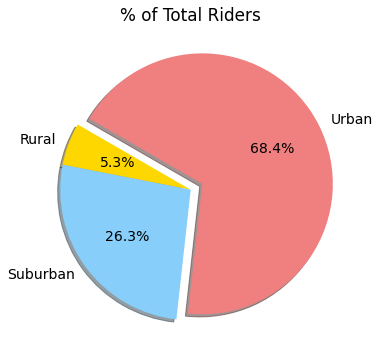

In [129]:
# create pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_riders_percentage, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=150)
plt.title('% of Total Riders')
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [135]:
# total drivers pie chart

# get the total number of drivers
total_drivers = pyber_data_df.sum()['driver_count']

# get the total number of drivers for each city type
type_total_drivers = pyber_data_df.groupby(['type']).sum()['driver_count']

# find the percentages for each city type
type_drivers_percentage = type_total_drivers / total_drivers * 100

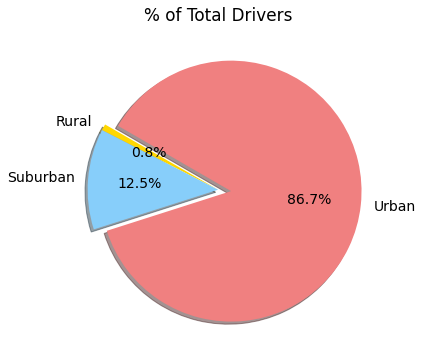

In [136]:
# create pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_drivers_percentage, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=150)
plt.title('% of Total Drivers')
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()